___
# Ciência dos Dados - PROJETO 1

## Henrique Thomé e Beni Stern
___

## Investigando mulheres chefes de família

___
## Introdução

    Nesse projeto vamos estudar as mulheres chefes de família. Em um país ainda muito machista e patriarcal como o Brasil, achamos que seria interessante analisar como esses preconceitos se manifestam e como afetam no dia a dia da população. Para isso usaremos os dados da PNAD de 2011 e depois compararemos com o de 2015, de modo a verificar se estamos melhorando


## Pergunta
    Será que existe uma diferença salarial entre homens e mulheres chefes de familia? Para descobrir a resposta compararemos o salario de homens e mulheres chefes de família que tem um mesmo nível de educação
    Será que a situação de ser chefe de familia se da por uma questão de escolaridade, ou de necessidade?

___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Beni Stern\Desktop\CDD\Projeto_1_CDD


In [3]:
#Se usar o arquivo descompactado
pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
pnad_2011 = pd.read_csv("PES2011.csv")
dic_2011 = pd.read_excel("Dicionario de variaveis de pessoas - PNAD 2011.xls")

pnad_2015 = pd.read_csv("PES2015.csv")
dic_2015 = pd.read_excel("Dicionario de variaveis de pessoas - PNAD 2015.xls")

### Filtro pergunta1 2011/2015

In [42]:
pnad_filtro_perg1 = pnad_2011.loc[pnad_2011.V0401 == 1,['V0302','V4750','V6007']]
pnad_filtro_perg1.dropna()
pnad_filtro_perg1.columns = ['SEXO', 'RENDA', 'ESCOLARIDADE']
pnad_filtro_perg1.rename(index=int, columns={2: "Homem", 4: "Mulher"})
pnad_filtro_perg1_2015 = pnad_2015.loc[pnad_2011.V0401 == 1,['V0302','V4750','V6007']]
pnad_filtro_perg1_2015.dropna
pnad_filtro_perg1_2015.columns = ['SEXO', 'RENDA', 'ESCOLARIDADE']
#pnad_filtro_perg1_grafico = pnad_filtro_perg1.loc[pnad_filtro_perg1.'Curso mais elevado que frequentou'== 2]
#pnad_filtro_perg1_grafico.head()
pnad_filtro_perg1.head()

,SEXO,RENDA,ESCOLARIDADE
0,2,1.000000e+12,1.0
4,4,1.461000e+03,5.0
8,4,1.000000e+12,5.0
10,4,1.000000e+03,5.0
16,2,8.600000e+02,1.0


### Filtro pergunta 2 2011/2015

In [86]:
pnad_filtro_perg2 = pnad_2011.loc[(pnad_2011.V0302 == 4)&(pnad_2011.V0401 < 3),['V0401','V0404','V4111','V6007','V1141','V1142','V4707']]
pnad_filtro_perg2.columns = ['CUD','RACA','COMPANHIA','Curso mais elevado que frequentou anteriormente','Número de filhos tidos, do sexo masculino, que moravam no domicílio','Número de filhos tidos, do sexo feminino, que moravam no domicílio','Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para pessoas de 10 anos ou mais de idade']
pnad_filtro_perg2_2015 = pnad_2015.loc[(pnad_2011.V0302 == 4)&(pnad_2011.V0401 < 3),['V0401','V0404','V4111','V6007','V1141','V1142','V4707']]
pnad_filtro_perg2_2015.columns = ['CUD','RACA','COMPANHIA','Curso mais elevado que frequentou anteriormente','Número de filhos tidos, do sexo masculino, que moravam no domicílio','Número de filhos tidos, do sexo feminino, que moravam no domicílio','Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para pessoas de 10 anos ou mais de idade']


___
## Análise e Resultados

In [33]:
ct1=pd.crosstab(pnad_filtro_perg1.ESCOLARIDADE, pnad_filtro_perg1.SEXO, margins=True, rownames=['ESCOLARIDADE'], colnames=['SEXO'], normalize=True)*100
ct1


SEXO,2,4,All
ESCOLARIDADE,,,
1.0,12.545693,8.174404,20.720097
2.0,2.852081,1.958069,4.810150
3.0,1.722856,1.276869,2.999725
4.0,19.162195,8.673340,27.835534
5.0,16.760175,9.249661,26.009836
6.0,0.778951,0.563085,1.342036
7.0,1.137370,0.706656,1.844027
8.0,7.437200,5.133949,12.571149
9.0,0.579377,0.347219,0.926595


2 - homem 4 - mulher

In [ ]:
Nessas tabelas e gráficos compararemos o nivel de escolaridade vs a renda com distinção de sexo.

In [90]:
UF3=pd.crosstab(pnad_filtro_perg1_2015.RENDA, pnad_filtro_perg1_2015.SEXO, margins=True, rownames=['ESCOLARIDADE'], colnames=['SEXO'], normalize=True)
UF3

SEXO,2,4,All
ESCOLARIDADE,,,
0.0,0.004210,0.006684,0.010894
6.0,0.000000,0.000018,0.000018
7.0,0.000009,0.000009,0.000018
8.0,0.000054,0.000018,0.000072
10.0,0.000018,0.000036,0.000054
11.0,0.000036,0.000027,0.000063
12.0,0.000009,0.000018,0.000027
14.0,0.000054,0.000036,0.000090
15.0,0.000108,0.000108,0.000216


2 - homem 4 - mulher

É possível analisar na tabela que os homens são maioria no universo educacional. Seja qual for o nível de escolaridades há uma porcentagem predominante do sexo masculino

In [1]:
mediah = UF3[2].mean()
mediam = UF3[4].mean()
mediah


NameError: name 'UF3' is not defined

In [106]:
mediam

0.00028640432572093826

In [43]:
ct3=pd.crosstab(pnad_filtro_perg1_2015.ESCOLARIDADE, pnad_filtro_perg1_2015.SEXO, margins=True, rownames=['ESCOLARIDADE'], colnames=['SEXO'], normalize=True)*100
ct3

SEXO,2,4,All
ESCOLARIDADE,,,
1.0,5.842001,7.048047,12.890048
2.0,1.197680,1.346867,2.544547
3.0,0.616268,0.844929,1.461197
4.0,15.309110,13.180056,28.489167
5.0,16.176348,18.046067,34.222414
6.0,0.535401,0.667856,1.203257
7.0,0.960654,1.114024,2.074677
8.0,6.239369,8.870361,15.109729
9.0,0.415493,0.450350,0.865843


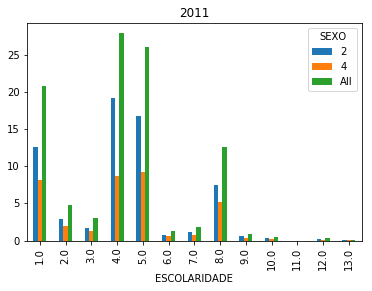

In [55]:
plot = ct1.iloc[0:13,].plot(kind='bar', title='2011',)

plt.show()

In [ ]:
Sexo e escolaridade nos chefes de famili

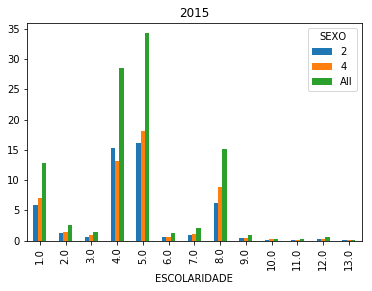

In [56]:
plot = ct3.iloc[0:13,].plot(kind='bar',title='2015',)

plt.show()

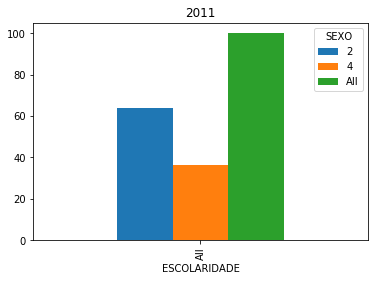

In [57]:
plot = ct1.iloc[13:,].plot(kind='bar',title='2011',)

plt.show()

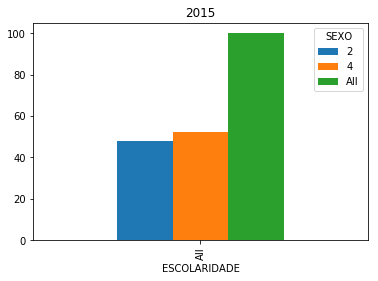

In [58]:
plot = ct3.iloc[13:,].plot(kind='bar',title='2015',)

plt.show()

In [36]:
ct2=(pd.crosstab(pnad_filtro_perg1.ESCOLARIDADE, pnad_filtro_perg1.SEXO, margins=True, rownames=['ESCOLARIDADE'], colnames=['SEXO'], normalize='columns')*100).round(decimals=0)
ct2

SEXO,2,4,All
ESCOLARIDADE,,,
1.0,20.0,22.0,21.0
2.0,4.0,5.0,5.0
3.0,3.0,4.0,3.0
4.0,30.0,24.0,28.0
5.0,26.0,25.0,26.0
6.0,1.0,2.0,1.0
7.0,2.0,2.0,2.0
8.0,12.0,14.0,13.0
9.0,1.0,1.0,1.0


(0, 100)

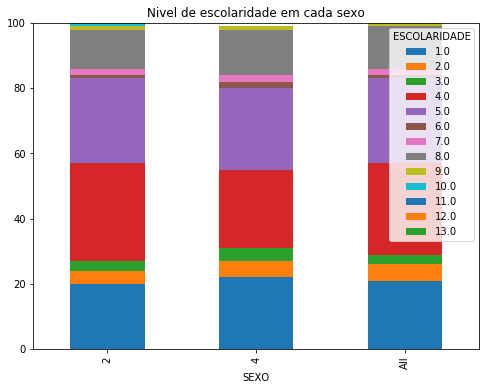

In [24]:
plot = ct2.T.plot(kind='bar', stacked=True,title='Nivel de escolaridade em cada sexo',figsize=(8, 6))
plot.set_ylim([0, 100])

Gráfico 5

In [59]:
ct4=(pd.crosstab(pnad_filtro_perg1_2015.ESCOLARIDADE, pnad_filtro_perg1_2015.SEXO, margins=True, rownames=['ESCOLARIDADE'], colnames=['SEXO'], normalize='columns')*100).round(decimals=0)
ct4

SEXO,2,4,All
ESCOLARIDADE,,,
1.0,12.0,14.0,13.0
2.0,3.0,3.0,3.0
3.0,1.0,2.0,1.0
4.0,32.0,25.0,28.0
5.0,34.0,35.0,34.0
6.0,1.0,1.0,1.0
7.0,2.0,2.0,2.0
8.0,13.0,17.0,15.0
9.0,1.0,1.0,1.0


(0, 100)

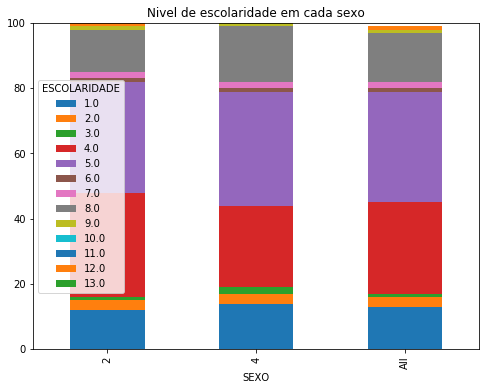

In [72]:
plot = ct4.T.plot(kind='bar', stacked=True,title='Nivel de escolaridade em cada sexo',figsize=(8, 6))
plot.set_ylim([0, 100])

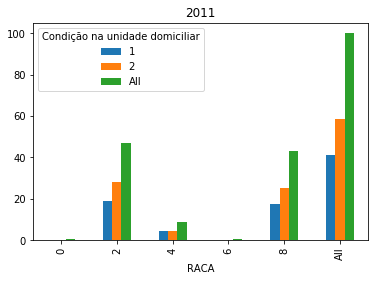

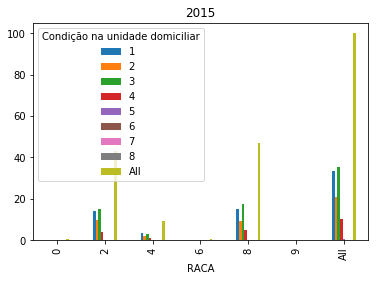

In [103]:
ct5=pd.crosstab(pnad_filtro_perg2.RACA, pnad_filtro_perg2.CUD, margins=True, rownames=['RACA'], colnames=['Condição na unidade domiciliar'], normalize=True)*100

ct6=pd.crosstab(pnad_filtro_perg2_2015.RACA, pnad_filtro_perg2_2015.CUD, margins=True, rownames=['RACA'], colnames=['Condição na unidade domiciliar'], normalize=True)*100

plot = ct5.plot(kind='bar', title='2011',)
plt.show()

plot = ct6.plot(kind='bar',title='2015',)
plt.show()

#### ___
## Conclusão 

Como podemos analisar, é possível observar uma grande disparidade entre as realidades dos homens e mulheres chefes de família. Para início da analise, resolvemos comparar os diferentes sexos no ambito da escolaridade, obeservando apenas os chefes de família. Há uma grande disparidade e os dados mostram que as mulheres estão menos presentes no sistema educacional como um todo, com a diferença entre os sexos sendo um pouco menos conforme o nível de escolaridade vai aumentando.
Ao comparar o nível de escolariade por sexo, usando o gráfico que mostra a distribuição de cada sexo no seu total, grafico 5, é perceptível que homens e mulheres no brasil, mesmo que em proporcoes diferentes, ficam na escola por um mesmo período, o que indica que não há um problema em específico que força as mulheres a sairem da escola.
Além disso é possível observar a disperidade racial mesmo entre o mesmo sexo, no qual as pessoas negras e pardas tem uma menor renda.
Essas fatos podem ser explicados pelo passado patriarcal e com escravidão no Brasil.
  